<a href="https://colab.research.google.com/github/LAUROJAS3/Seminario_RN/blob/main/LRC_02_Notations_%26_Definitions_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Operaciones con Vectores: Multiplicación Escalar, Suma y Producto Punto de Vectores

En este laboratorio utilizaras funciones de Python y `NumPy` para realizar las operaciones principales con vectores:

Multiplicacion escalar, suma de vectores y su producto punto. También investigaras la velocidades cálculos utilizando formas con bucles y vectorizadas de estas operaciones principales de algebra lineal.

#Tabla de Contenidos
- [ 1- Multiplicacion Escalar y Suma de Vectores](#1)
  - [ 1.1 - Visualización de un Vector $v\in\mathbb{R}^2$](#1.1)
  - [ 1.2 - Multipicación Escalar](#1.2)
  - [ 1.3 - Suma de Vectores](#1.3)
  - [ 1.4 - Norma de un Vector](#1.4)
- [ 2 - Producto Punto](#2)
  - [ 2.1 - Definicion Algebraica del Producto Punto](#2.1)
  - [ 2.2 - Producto Punto con Python](#2.2)
  - [ 2.3 - Definicion Geométrica del Producto Punto](#2.3)
  - [ 2.4 - Aplicación del Producto Punto: Similitud de Vectores](#2.4)

##Paquetes
Carga el paquete `NumPy` para acceder a sus funciones

In [ ]:
import numpy as np

<a name='1'></a>
##1 -Multiplicación Escalar y Suma de Vectores

<a name='1.1'></a>
###1.1 - Visualización de un Vector $v\in\mathbb{R}^2$
Como ya has visto en los videos y laboratorios, los vectores se pueden visualizar como flechas, y es fácil hacerlo para un $v\in\mathbb{R}^2$, por ejemplo:
$v=\begin{bmatrix}
          1 & 3
\end{bmatrix}^T$
El siguiente código mostrara la visualización.

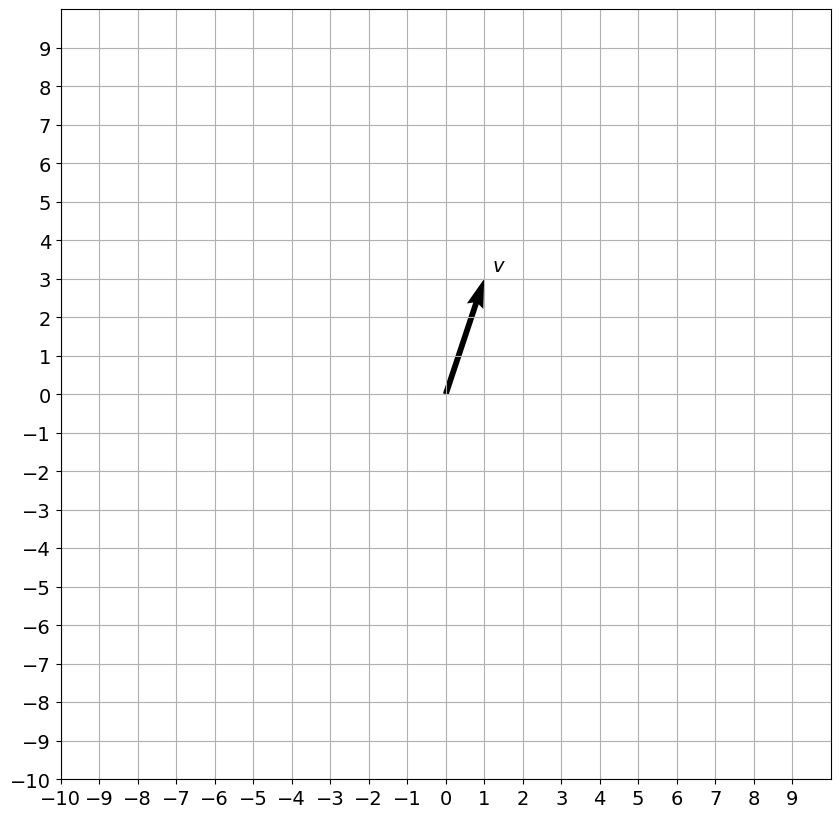

In [ ]:
import matplotlib.pyplot as plt
def plot_vectors(list_v, list_label, list_color):
  _, ax = plt.subplots(figsize=(10,10))
  ax.tick_params(axis='x', labelsize=14)
  ax.tick_params(axis='y', labelsize=14)
  ax.set_xticks(np.arange(-10,10))
  ax.set_yticks(np.arange(-10,10))

  plt.axis([-10, 10, -10, 10])
  for i, v in enumerate(list_v):
    sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v)])
    plt.quiver(v[0], v[1], color=list_color[i], angles='xy', scale_units='xy', scale=1)
    ax.text(v[0]-0.2+sgn[0], v[1]-0.2+sgn[1],list_label[i], fontsize=14, color=list_color[i])

  plt.grid()
  plt.gca().set_aspect("equal")
  plt.show()

v=np.array([[1],[3]])
#Argumennts: list of vectors as NumPy arrays, labels, colors.
plot_vectors([v], [f"$v$"], ["black"])

El vector se define por su **norma (longitud, magnitud)** y **dirección**, no por su posición actual, sin embargo, para mayor claridad y conveniencia, a mennudo se representan los vectores comenzando en el origen (en $\mathbb{R}^2$ es el punto $(0,0)$)

<a name='1.2'></a>
###1.2 - Multiplicación Escalar
La **multiplicación escalar** de un vector $v=\begin{bmatrix}
          v_1 & v_2 & \ldots & v_n
\end{bmatrix}^T\in\mathbb{R}^n$ por un escalar $k$ es un vector $kv=\begin{bmatrix}
          kv_1 & kv_2 & ... & kv_n
\end{bmatrix}^T$ (multiplicación elemento por elemento). Si $k>0$, entonces $k$ es un vector que apunta en la misma dirección que $v$ y es $k$ veces mas largo que  $v$. Si $k=0$, entonces $kv$ es un vector nulo.  Si $k<0$, el vector $kv$ apuntara en la dirección opuesta. En Python, puedes realizar esta operación con el operador '*'. Observa el ejemplo a continuación:

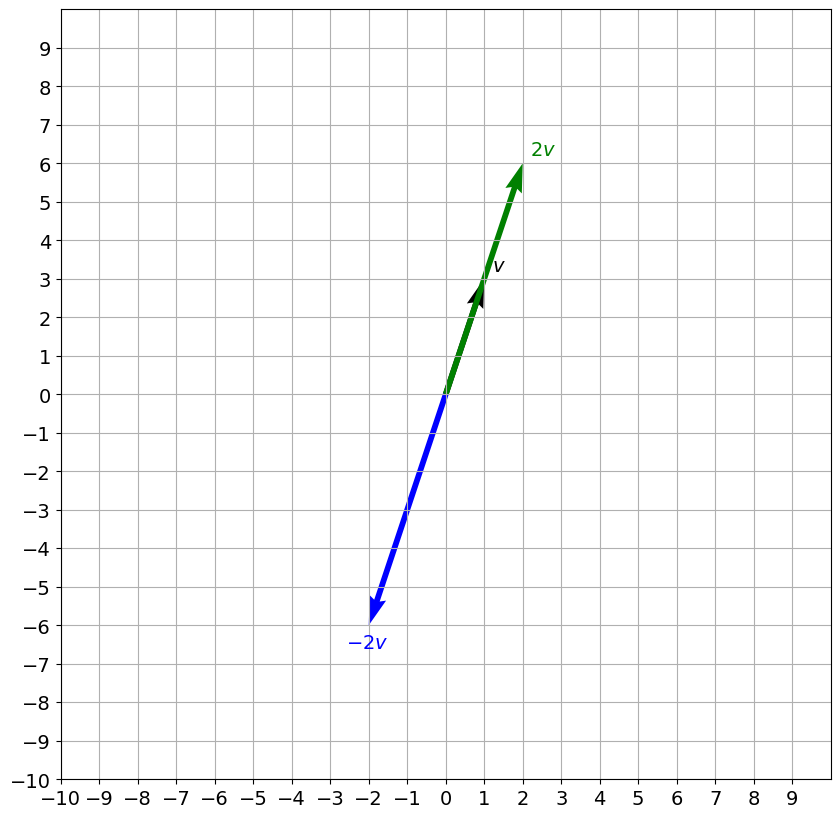

In [ ]:
plot_vectors([v, 2*v, -2*v], [f"$v$", f"$2v$", f"$-2v$"],["black", "green", "blue"])

<a name='1.3'></a>
### 1.3 - Suma de Vectores
La **suma de vectores (adición de vectores)** se puede realizar sumando los componentes correspondientes de los vectores: si $v=\begin{bmatrix}
          v_1 & v_2 & ... & v_n
\end{bmatrix}^T\in\mathbb{R}^n$ y  
$w=\begin{bmatrix}
          w_1 & w_2 & \ldots & w_n
\end{bmatrix}^T\in\mathbb{R}^n$, entonces $v + w=\begin{bmatrix}
          v_1 + w_1 & v_2 + w_2 & ... & v_n + w_n
\end{bmatrix}^T\in\mathbb{R}^n$. La llamada **ley del paralelogramo** proporciona la regla para la adición de vectores. Para dos vectores $u$ y $v$ representados por los lados adyacentes (tanto en magnitud como en dirección) de un paralelogramo dibujado desde un punto, la suma de vectores $u+v$ está representada por la diagonal del paralelogramo dibujada desde el mismo punto.
En Python, puedes usar el operador `+` o la función `np.add()` de `NumPy`. En el siguiente código, puedes descomentar la línea para verificar que el resultado será el mismo:

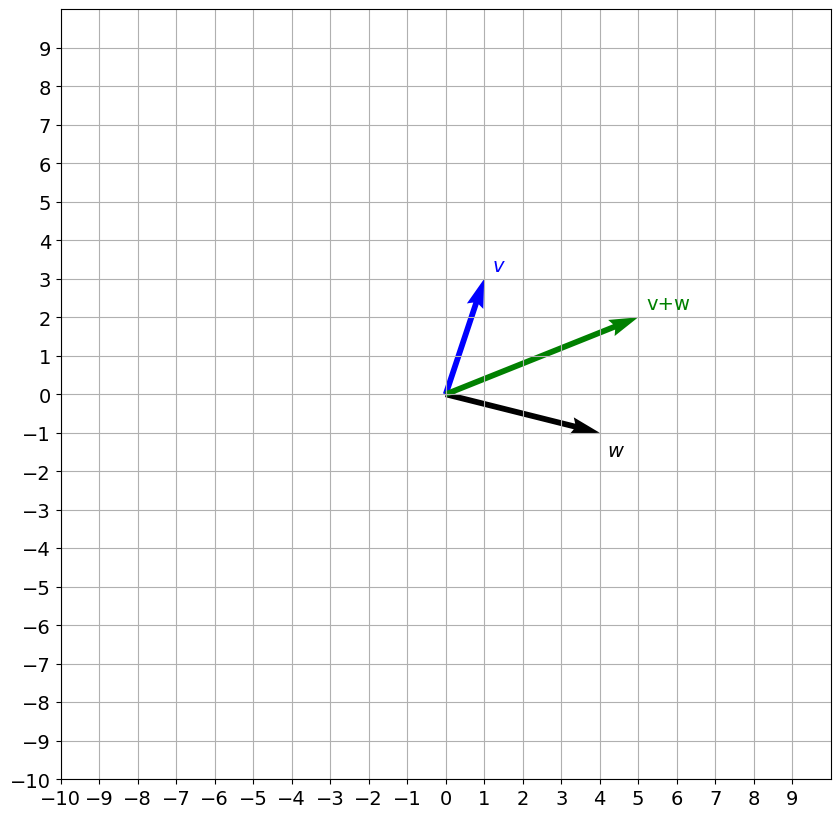

In [ ]:
v=np.array([[1],[3]])
w=np.array([[4],[-1]])

plot_vectors([v, w, v+w],[f"$v$",f"$w$",f"v+w"],["blue","black","green"])
# plot_vectors([v, w, np.add(v, w)], [f"$v$", f"$w$", f"$v + w$"], ["black", "black", "red"])

<a name='1.4'></a>
### 1.4 - Norma de un Vector
La norma de un vector $v$ se denota como $\lvert v\rvert$. Es un número no negativo que describe la extensión del vector en el espacio (su longitud). La norma de un vector se puede encontrar utilizando la función `np.linalg.norm()` de `NumPy`:

In [ ]:
print("Norm of  a vector v is:",np.linalg.norm(v))

Norm of  a vector v is: 3.1622776601683795


<a name='2'></a>
## 2 - Producto Punto
<a name='2.1'></a>
### 2.1 - Definición Algebraica del Producto Punto
El **producto punto** (o **producto escalar**) es una operación algebraica que toma dos vectores $x=\begin{bmatrix}
          x_1 & x_2 & ... & x_n
\end{bmatrix}^T\in\mathbb{R}^n$ e  
$y=\begin{bmatrix}
          y_1 & y_2 & ... & y_n
\end{bmatrix}^T\in\mathbb{R}^n$ y devuelve un único escalar. El producto punto se puede representar con un operador de punto $x\cdot y$ y se define como:
$$x\cdot y = \sum_{i=1}^{n} x_iy_i = x_1y_1+x_2y_2+ ... +x_ny_n \tag{1}$$
<a name='2.2'></a>
### 2.2 - Producto Punto con Python
La forma más sencilla de calcular el producto punto en Python es tomar la suma de las multiplicaciones elemento por elemento. Puedes definir los vectores $x$ e $y$ enumerando sus coordenadas:

In [ ]:
x=[1,-2,5]
y=[4,3,-1]

A continuación, definamos una función `dot(x, y)` para el cálculo del producto punto:

In [ ]:
def dot(x,y):
  s=0

  for xi, yi in zip(x,y):
    s += xi*yi
    return s

Por simplicidad, asumamos que los vectores pasados a la función anterior siempre tienen el mismo tamaño, de modo que no es necesario realizar verificaciones adicionales.
Ahora todo está listo para realizar el cálculo del producto punto llamando a la función `dot(x, y)`:

In [ ]:
print("The dot product of x and y is", dot(x, y))

The dot product of x and y is 4


El producto punto es un operador muy común, por lo que el paquete de álgebra lineal de `NumPy` proporciona una forma rápida de calcularlo mediante la función `np.dot()`:

In [ ]:
print("np.dot(x,y) function returns dot product of x and y:", np.dot(x, y))

np.dot(x,y) function returns dot product of x and y: -7


Ten en cuenta que no fue necesario definir los vectores $x$ e $y$ como arrays de `NumPy`; la función funcionó incluso con listas. Sin embargo, hay funciones alternativas en Python, como el operador explícito `@` para el producto punto, que solo se pueden aplicar a arrays de `NumPy`. Puedes ejecutar la siguiente celda para comprobarlo.

In [ ]:
print("This line output is a dot product of x and y: ", np.array(x) @ np.array(y))

print("\nThis line output is an error:")
try:
    print(x @ y)
except TypeError as err:
    print(err)

This line output is a dot product of x and y:  -7

This line output is an error:
unsupported operand type(s) for @: 'list' and 'list'


Dado que tanto los operadores `np.dot()` como `@` se utilizan comúnmente, se recomienda definir los vectores como arrays de `NumPy` para evitar errores. Volvamos a definir los vectores $x$ e $y$ como arrays de `NumPy` para estar seguros:

In [ ]:
x = np.array(x)
y = np.array(y)

<a name='2.4'></a>
### 2.4 - Definición Geométrica del Producto Punto
En [el espacio euclidiano](https://en.wikipedia.org/wiki/Euclidean_space), un vector euclidiano tiene tanto magnitud como dirección. El producto punto de dos vectores $x$ e $y$ se define por:
$$x\cdot y = \lvert x\rvert \lvert y\rvert \cos(\theta),\tag{2}$$
donde $\theta$ es el ángulo entre los dos vectores
Esto proporciona una manera fácil de probar la ortogonalidad entre vectores. Si $x$ e $y$ son ortogonales (el ángulo entre los vectores es $90^{\circ}$), entonces, ya que $\cos(90^{\circ})=0$, implica que **el producto punto de cualquier par de vectores ortogonales debe ser $0$**. Probémoslo, tomando dos vectores $i$ y $j$ que sabemos que son ortogonales:

In [ ]:
i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
print("The dot product of i and j is", dot(i, j))

The dot product of i and j is 0


<a name='2.5'></a>
### 2.5 - Aplicación del Producto Punto: Similitud de Vectores

La definición geométrica del producto punto se utiliza en una de las aplicaciones, que es evaluar la **similitud de vectores**. En el Procesamiento del Lenguaje Natural (NLP), las palabras o frases del vocabulario se asignan a un vector correspondiente de números reales. La similitud entre dos vectores se puede definir como el coseno del ángulo entre ellos. Cuando apuntan en la misma dirección, su similitud es 1 y disminuye con el aumento del ángulo.

Luego, la ecuación $(2)$ se puede reorganizar para evaluar el coseno del ángulo entre vectores:

$\cos(\theta)=\frac{x \cdot y}{\lvert x\rvert \lvert y\rvert}.\tag{3}$

El valor cero corresponde a la similitud nula entre vectores (y las palabras correspondientes a esos vectores). El valor más alto es cuando los vectores apuntan en la misma dirección, el valor más bajo es cuando los vectores apuntan en direcciones opuestas.

Este ejemplo de similitud de vectores se proporciona para vincular el material con las aplicaciones de Aprendizaje Automático. No habrá una implementación real de esto en este curso.